In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [4]:
data = pd.read_csv("C:\\Users\\Bibek Rauth\\Desktop\\EDA\\EDA1-master\\titanic_train.csv")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.shape

(891, 12)

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

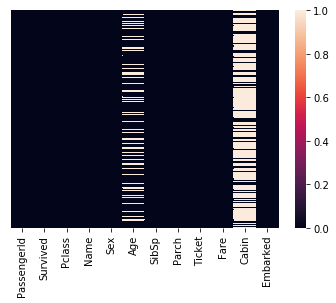

In [10]:
sns.heatmap(data.isnull(), yticklabels= False)

In [21]:
#null_col = (data.isnull().sum()/data.shape[0])*100
null_col = data.isnull().sum()/data.shape[0]*100
null_col

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [22]:
null_col>20

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [26]:
null_col_gre_20 = null_col[null_col>20].keys()
null_col_gre_20

Index(['Cabin'], dtype='object')

In [27]:
drop_col_gre_20 = data.drop(columns=null_col_gre_20)

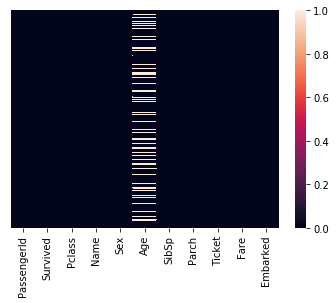

In [28]:
sns.heatmap(drop_col_gre_20.isnull(), yticklabels = False)

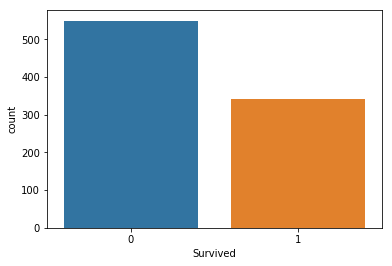

In [29]:
sns.countplot(x = 'Survived', data = drop_col_gre_20 )

In [30]:
for value, count in drop_col_gre_20["Survived"].value_counts().items():
   print(value, count)
    

0 549
1 342


In [35]:
drop_col_gre_20["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

C:\Users\Bibek Rauth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


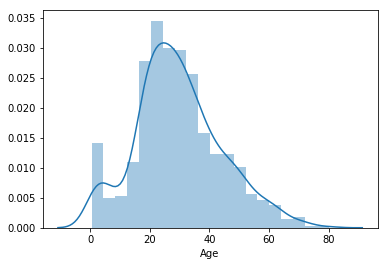

In [37]:
sns.distplot(drop_col_gre_20["Age"].dropna())

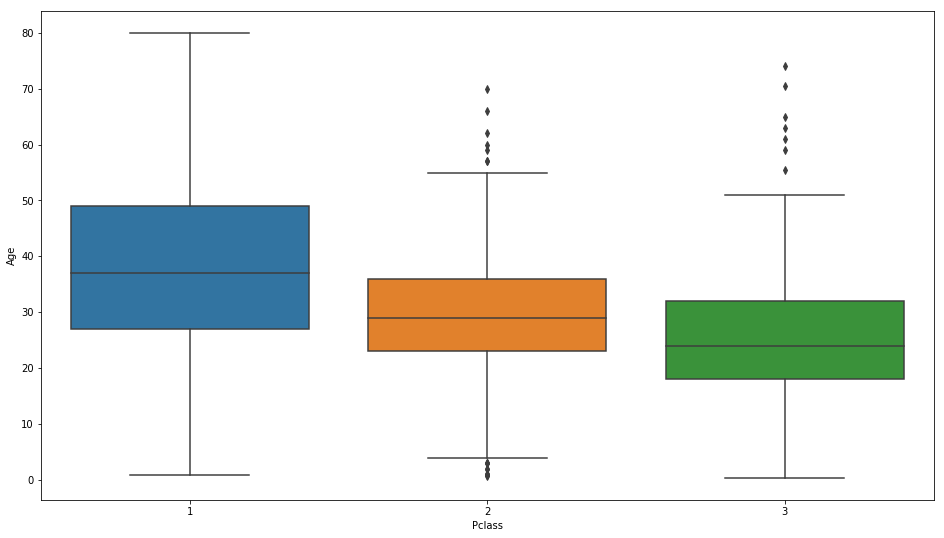

In [40]:
#drop_col_gre_20["Age"].mean()
plt.figure(figsize=(16,9))
sns.boxplot(x='Pclass', y='Age', data=drop_col_gre_20)

In [48]:
drop_col_gre_20.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [43]:
drop_col_gre_20['Age'] = drop_col_gre_20[['Age', 'Pclass']].apply(input_age, axis = 1)

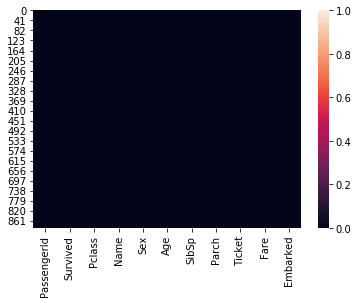

In [45]:
sns.heatmap(drop_col_gre_20.isnull())

In [46]:
withoutNa_data = drop_col_gre_20

In [47]:
withoutNa_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64